# Pytorch Implementation of ResNet

## Overview of the project:
1. Get the data ready
2. Build or pick a model
    1. Pick a loss function
    2. Build a training loop
3. Fit the model to the data
4. Evaluate the model
5. Improve through experimentation
6. Save and reload your trained model

# 0. Setup

In [2]:
import torch
import torchvision
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from torchvision.transforms import ToTensor

In [3]:
data_path = Path("data")

train_dir = data_path / "train"
test_dir = data_path / "test"

# 1. Get the data

In [4]:
train_data = torchvision.datasets.CIFAR10(root=data_path,
                                          train=True,
                                          download=True,
                                          transform=ToTensor())

test_data = torchvision.datasets.CIFAR10(root=data_path,
                                         train=False,
                                         download=True,
                                         transform=ToTensor())

train_data, test_data

Files already downloaded and verified
Files already downloaded and verified


(Dataset CIFAR10
     Number of datapoints: 50000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset CIFAR10
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [5]:
train_dataloader = torch.utils.data.DataLoader(dataset=train_data,
                                               batch_size=32,
                                               shuffle=True)

test_dataloader = torch.utils.data.DataLoader(dataset=test_data,
                                              batch_size=32,
                                              shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x155202d5d80>,
 <torch.utils.data.dataloader.DataLoader at 0x155202d6a70>)

In [12]:
class_names = train_data.classes

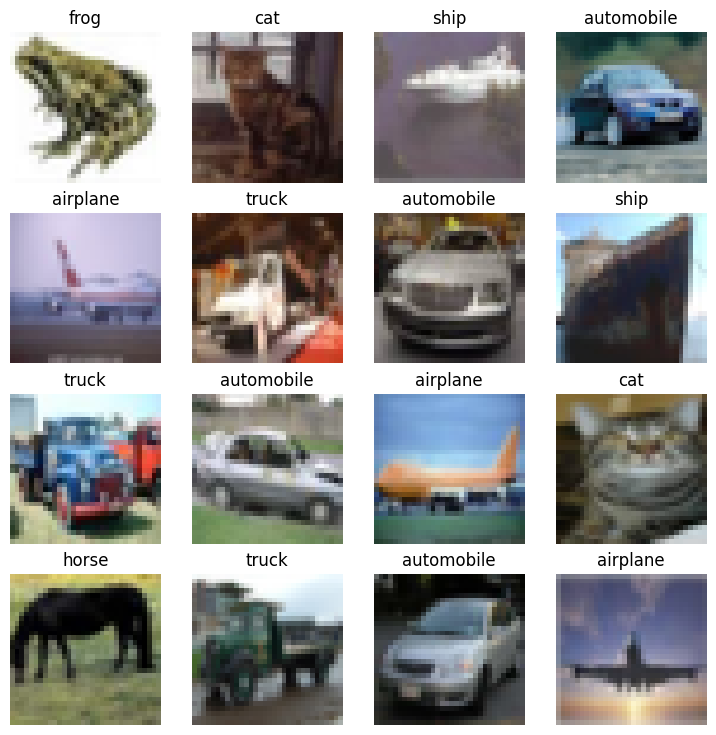

In [14]:
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4

for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze().permute(1, 2, 0), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)
    